In [1]:
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from scipy.integrate import solve_ivp
import matplotlib; 
from matplotlib.pyplot import *
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        t_next, x_next = t + dt, x + dt * f(x)
        x_back = x_next - dt * f(x_next)
        ratio_abs_error = atol / (linalg.norm(x_back-x)/2)  
        dt = 0.9 * dt * sqrt(ratio_abs_error)
        if dt < dtmin:
            raise ValueError("Time step below minimum")
        elif dt > dtmax/2:
            dt = dtmax/2
        t_next, x_next = t + dt, x + dt * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, x = t_next, x_next
    return (ts, xs.T)

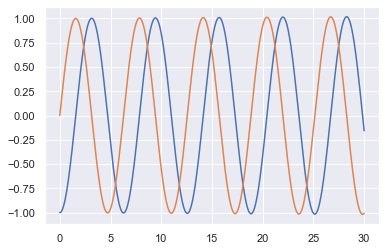

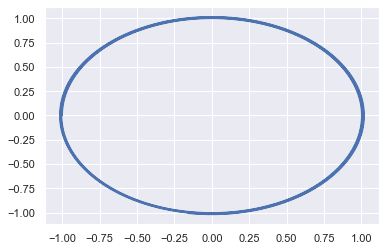

In [3]:
omega = 1

def f(xy):
    x, y = xy
    return array([y, -omega*x])

t0, tf, x0 = 0.0, 30.0, array([-1.0, 0.0])

t, x = solve_ivp_euler_explicit_variable_step(f, t0, x0, tf)

figure()
plot(t, x[0])
plot(t, x[1])
grid(True)

figure()
plot(x[0],x[1])

In [4]:
def f(xabc):
    xa, xb, xc = xabc
    return array([-0.04 * xb + 1e4 * xb * xc, 0.04 * xa - 1e4 * xb * xc - 3e7 * xb**2,  3e7 * xb**2])

t0, tf, x0 = 0.0, 5.0, array([1.0, 0.0, 0.0])

t, x = solve_ivp_euler_explicit_variable_step(f, t0, x0, tf, dtmin = 1e-20, atol = 1)

figure()
plot(t, x[0])
plot(t, x[1])
plot(t, x[2])
grid(True)


ValueError: Time step below minimum

In [5]:
e = 0.01
q0 = array([1-e,0.0])
p0 = array([0.0,sqrt((1+e)/(1-e))])
t0, tf, dt = 0.0 , 50.0, 0.01

In [6]:
def solve_ivp_euler_symplectic(fp, fq, t0, q0, p0, dt, tf):
    ts, qs, ps = [t0], [q0], [p0]
    while ts[-1] < tf:
        t, q, p = ts[-1], qs[-1], ps[-1]
        t_next, q_next = t + dt, q + dt*fq(p)
        p_next = p + dt*fp(q_next)
        ts = vstack([ts,t_next])
        qs = vstack([qs,q_next])
        ps = vstack([ps,p_next])
    return (ts, qs.T, ps.T)

In [7]:
def fq(p):
    return p

def fp(q):
    q1, q2 = q
    return array([-q1/power(q1**2+q2**2,3/2),-q2/power(q1**2+q2**2,3/2)])

def fun(qp):
    q1, q2, p1, p2 = qp
    return concatenate([fq([p1,p2]),fp([q1,q2])])

Text(0.5, 1.0, 'Euler explicite pas variable')

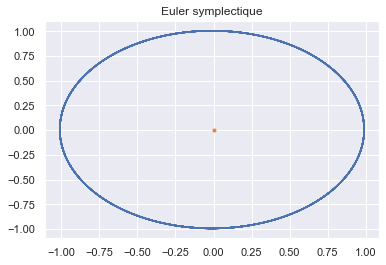

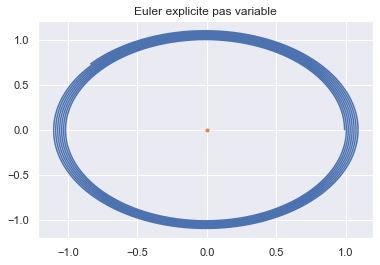

In [8]:
t, q, p = solve_ivp_euler_symplectic(fp, fq, t0, q0, p0, dt, tf)

t, qp = solve_ivp_euler_explicit_variable_step(fun, t0, concatenate([q0,p0]), tf)

figure()
plot(q[0], q[1])
plot([0.0],[0.0],'.')
grid(True)
title('Euler symplectique')

figure()
plot(qp[0],qp[1])
plot([0.0],[0.0],'.')
grid(True)
title('Euler explicite pas variable')